In [34]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
sys.path.append(os.path.abspath('../scripts'))
from utility import read_csv_file, detect_outliers_iqr, analyze_handsets_data, find_high_correlation_pairs, calculate_decile, get_important_features
from plot import plot_histograms, plot_boxplots, plot_bar_chart, plot_pie_chart, plot_stacked_bar, plot_correlation_heatmap

Read Dataset

In [36]:
data_path = '../data/Copy of Week2_challenge_data_source(CSV).csv'
telecom_data = read_csv_file(data_path)

In [37]:
telecom_data = telecom_data.get("data")
telecom_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [38]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [81]:
telecom_data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Start ms,148917.0,4.992381e+02,2.885528e+02,0.0,250.0,499.0,749.0,9.990000e+02
End ms,148917.0,4.987025e+02,2.880961e+02,0.0,251.0,500.0,750.0,9.990000e+02
Dur. (ms),148917.0,1.048238e+05,8.089658e+04,7142.0,57882.0,86399.0,132675.0,1.859336e+06
Avg RTT DL (ms),148917.0,9.649699e+01,5.369117e+02,0.0,35.0,45.0,62.0,9.692300e+04
Avg RTT UL (ms),148917.0,1.529461e+01,7.668816e+01,0.0,3.0,5.0,11.0,7.120000e+03
Avg Bearer TP DL (kbps),148917.0,1.328704e+04,2.397960e+04,0.0,43.0,63.0,19685.0,3.781600e+05
Avg Bearer TP UL (kbps),148917.0,1.770923e+03,4.629732e+03,0.0,47.0,63.0,1117.0,5.861300e+04
TCP DL Retrans. Vol (Bytes),148917.0,8.909417e+06,1.174224e+08,2.0,568730.0,568730.0,568730.0,4.294426e+09
TCP UL Retrans. Vol (Bytes),148917.0,2.849181e+05,1.583705e+07,1.0,20949.5,20949.5,20949.5,2.908226e+09
DL TP < 50 Kbps (%),148917.0,9.289827e+01,1.300690e+01,0.0,91.0,100.0,100.0,1.000000e+02


In [40]:
telecom_data.shape

(150001, 55)

In [41]:
telecom_data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Handle Missing Values

In [42]:

numerical_columns = [
    'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 
    'Avg Bearer TP UL (kbps)', 
    'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 
    'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', 
    '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 
    'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 
    'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 
    'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 
    'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B'
]

# Impute missing numerical values with the median
telecom_data[numerical_columns] = telecom_data[numerical_columns].apply(lambda x: x.fillna(x.median()))


In [43]:
# List of categorical columns that need imputation
categorical_columns = [
    'IMEI','MSISDN/Number','IMSI','Handset Manufacturer', 'Handset Type', 'Last Location Name'
]

# Impute missing categorical values with the mode
telecom_data[categorical_columns] = telecom_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))


In [44]:
# List of time-related columns that need imputation
time_columns = ['Start', 'End', 'Start ms', 'End ms', 'Bearer Id']

# Impute missing time values with forward fill
telecom_data[time_columns] = telecom_data[time_columns].fillna(method='ffill')


/tmp/ipykernel_51670/2879128285.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  telecom_data[time_columns] = telecom_data[time_columns].fillna(method='ffill')


In [45]:
# For application data columns (e.g., HTTP, Social Media, YouTube, etc.)
# If missing, impute with mean
application_data_columns = [
    'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Youtube DL (Bytes)','Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 
    'Total UL (Bytes)', 'Total DL (Bytes)','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'
]

# Impute missing values with mean
telecom_data[application_data_columns] = telecom_data[application_data_columns].apply(lambda x: x.fillna(x.median()))


In [46]:

# Convert Identifiers to Python's native int type and then to string ( to avoid overflow )
telecom_data['Bearer Id'] = telecom_data['Bearer Id'].apply(lambda x: str(int(x)))
telecom_data['IMSI'] = telecom_data['IMSI'].apply(lambda x: str(int(x)))
telecom_data['MSISDN/Number'] = telecom_data['MSISDN/Number'].apply(lambda x: str(int(x)))
telecom_data['IMEI'] = telecom_data['IMEI'].apply(lambda x: str(int(x)))



In [78]:
# Remove the IMSI '208201402778052' from the top_xdr_users DataFrame, it has exaggerated session than the others which might be an outlier
telecom_data = telecom_data[telecom_data['IMSI'] != '208201402778052']

#Exageratted session
telecom_data = telecom_data[telecom_data['MSISDN/Number'] != '33626320676']


# Display the updated DataFrame
print(telecom_data)


                   Bearer Id            Start  Start ms              End  \
0       13114483460844900352   4/4/2019 12:01     770.0  4/25/2019 14:35   
1       13114483482878900224   4/9/2019 13:04     235.0   4/25/2019 8:15   
2       13114483484080500736   4/9/2019 17:42       1.0  4/25/2019 11:58   
3       13114483485442799616   4/10/2019 0:31     486.0   4/25/2019 7:36   
4       13114483499480700928  4/12/2019 20:10     565.0  4/25/2019 10:40   
...                      ...              ...       ...              ...   
149995  13042425979329300480   4/29/2019 7:28     615.0   4/30/2019 0:01   
149996   7277825670196679680   4/29/2019 7:28     451.0   4/30/2019 6:02   
149997   7349883264234609664   4/29/2019 7:28     483.0  4/30/2019 10:41   
149998  13114483573367300096   4/29/2019 7:28     283.0  4/30/2019 10:46   
149999  13114483573367300096   4/29/2019 7:28     696.0  4/30/2019 10:40   

        End ms  Dur. (ms)             IMSI MSISDN/Number            IMEI  \
0        66

In [79]:
telecom_data.to_csv('../data/preprocessed.csv', index=False)

In [80]:
telecom_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total_Social_Media_Data,Total_Google_Data,Total_Email_Data,Total_Youtube_Data,Total_Netflix_Data,Total_Gaming_Data,Total_Other_Data,Total Duration,Duration Decile,Total DL + UL
0,13114483460844900352,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,2083209.0,9,345629377.0
1,13114483482878900224,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,208201909211140,33681854413,35794009006359,L77566A,...,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,1698167.0,9,707185356.0
2,13114483484080500736,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,208200314458056,33760627129,35281510359387,D42335A,...,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,1361762.0,9,307690973.0
3,13114483485442799616,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,208201402342131,33750343200,35356610164913,T21824A,...,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,1321509.0,9,889352748.0
4,13114483499480700928,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,208201401415120,33699795932,35407009745539,D88865A,...,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,1089009.0,9,607681403.0


In [50]:
telecom_data.isna().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

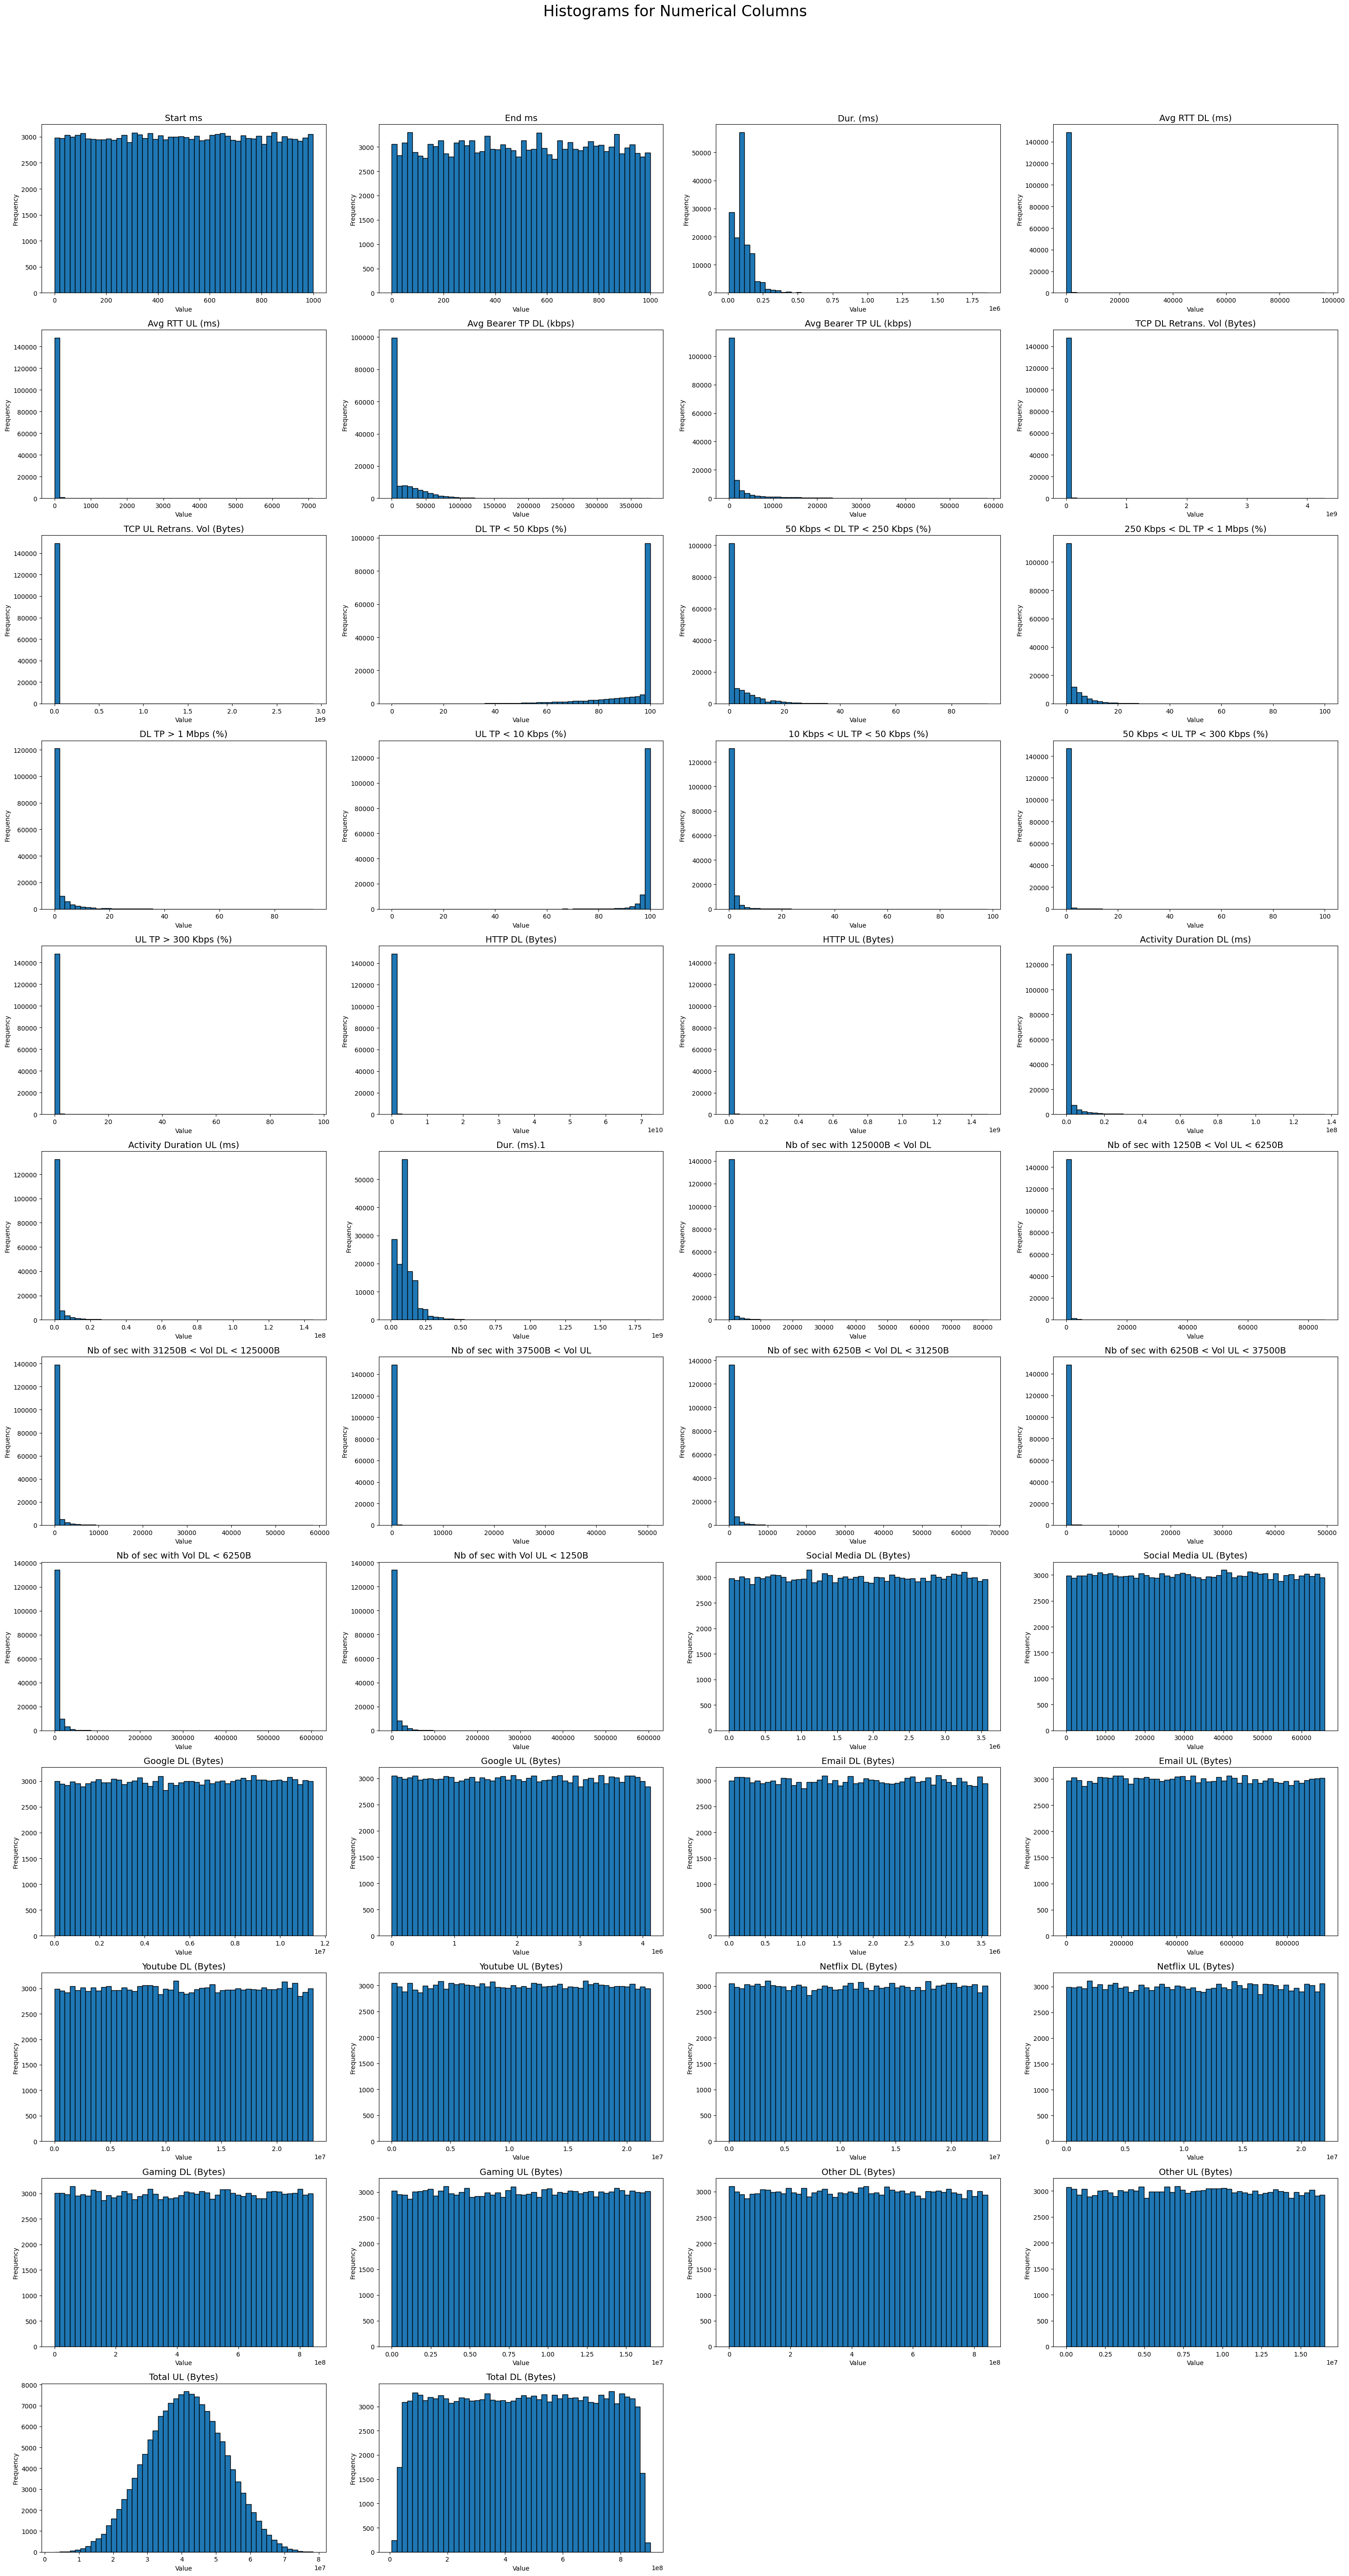

In [51]:
numerical_columns = telecom_data.select_dtypes(include=['float64', 'int64']).columns
plot_histograms(telecom_data, numerical_columns)

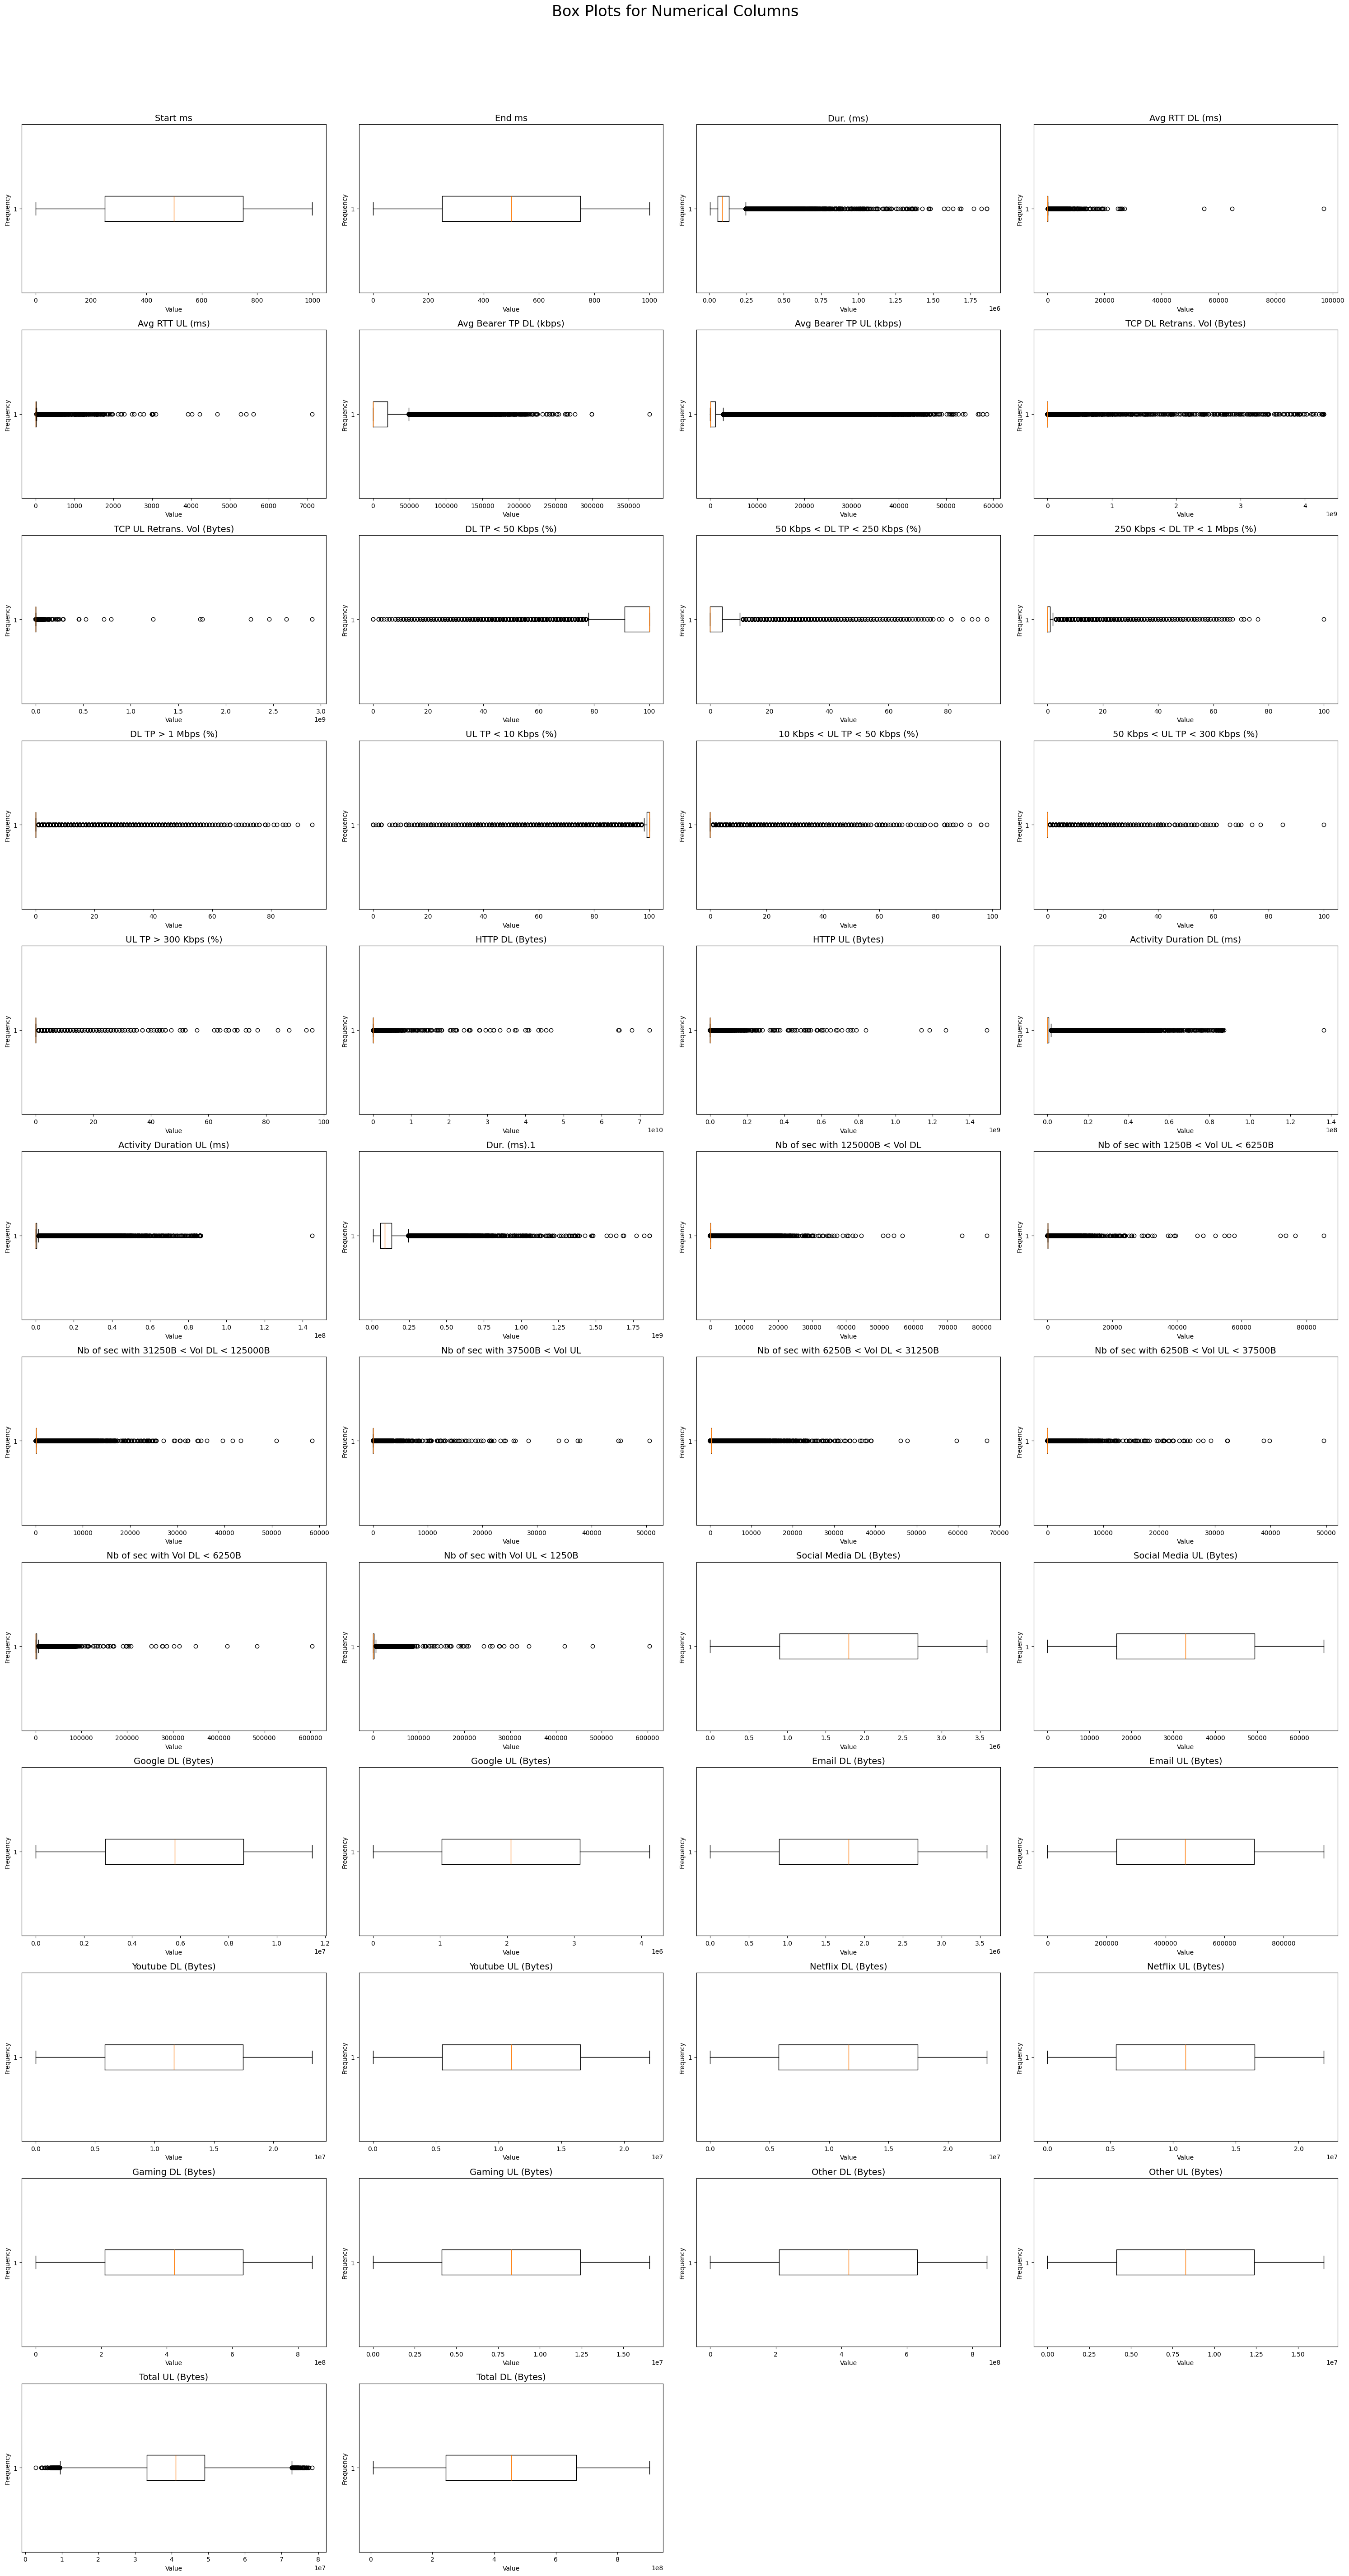

In [52]:
numerical_columns = telecom_data.select_dtypes(include=['float64', 'int64']).columns
plot_boxplots(telecom_data, numerical_columns)

Get the MSIN number of the outliers

In [53]:

# Automatically detect numerical columns
numerical_columns = telecom_data.select_dtypes(include=['float64']).columns  

# Call the function and get outlier IMSI
outlier_imsis = detect_outliers_iqr(telecom_data, numerical_columns, id_col='IMSI')

# Print the list of outlier IMSIs
print(f'Outlier IMSIs: {outlier_imsis}')

len(outlier_imsis)


Column: Start ms - Number of outliers: 0
Lower bound: 0 & Upper bound: 1497.5

Column: End ms - Number of outliers: 0
Lower bound: 0 & Upper bound: 1498.5

Column: Dur. (ms) - Number of outliers: 7157
Lower bound: 0 & Upper bound: 244899.0

Column: Avg RTT DL (ms) - Number of outliers: 17521
Lower bound: 0 & Upper bound: 102.5

Column: Avg RTT UL (ms) - Number of outliers: 20075
Lower bound: 0 & Upper bound: 23.0

Column: Avg Bearer TP DL (kbps) - Number of outliers: 13163
Lower bound: 0 & Upper bound: 49300.5

Column: Avg Bearer TP UL (kbps) - Number of outliers: 21477
Lower bound: 0 & Upper bound: 2727.0

Column: TCP DL Retrans. Vol (Bytes) - Number of outliers: 30767
Lower bound: 0 & Upper bound: 568730.0

Column: TCP UL Retrans. Vol (Bytes) - Number of outliers: 26522
Lower bound: 0 & Upper bound: 20949.5

Column: DL TP < 50 Kbps (%) - Number of outliers: 0
Lower bound: 0 & Upper bound: 113.5

Column: 50 Kbps < DL TP < 250 Kbps (%) - Number of outliers: 15139
Lower bound: 0 & Upper

53430

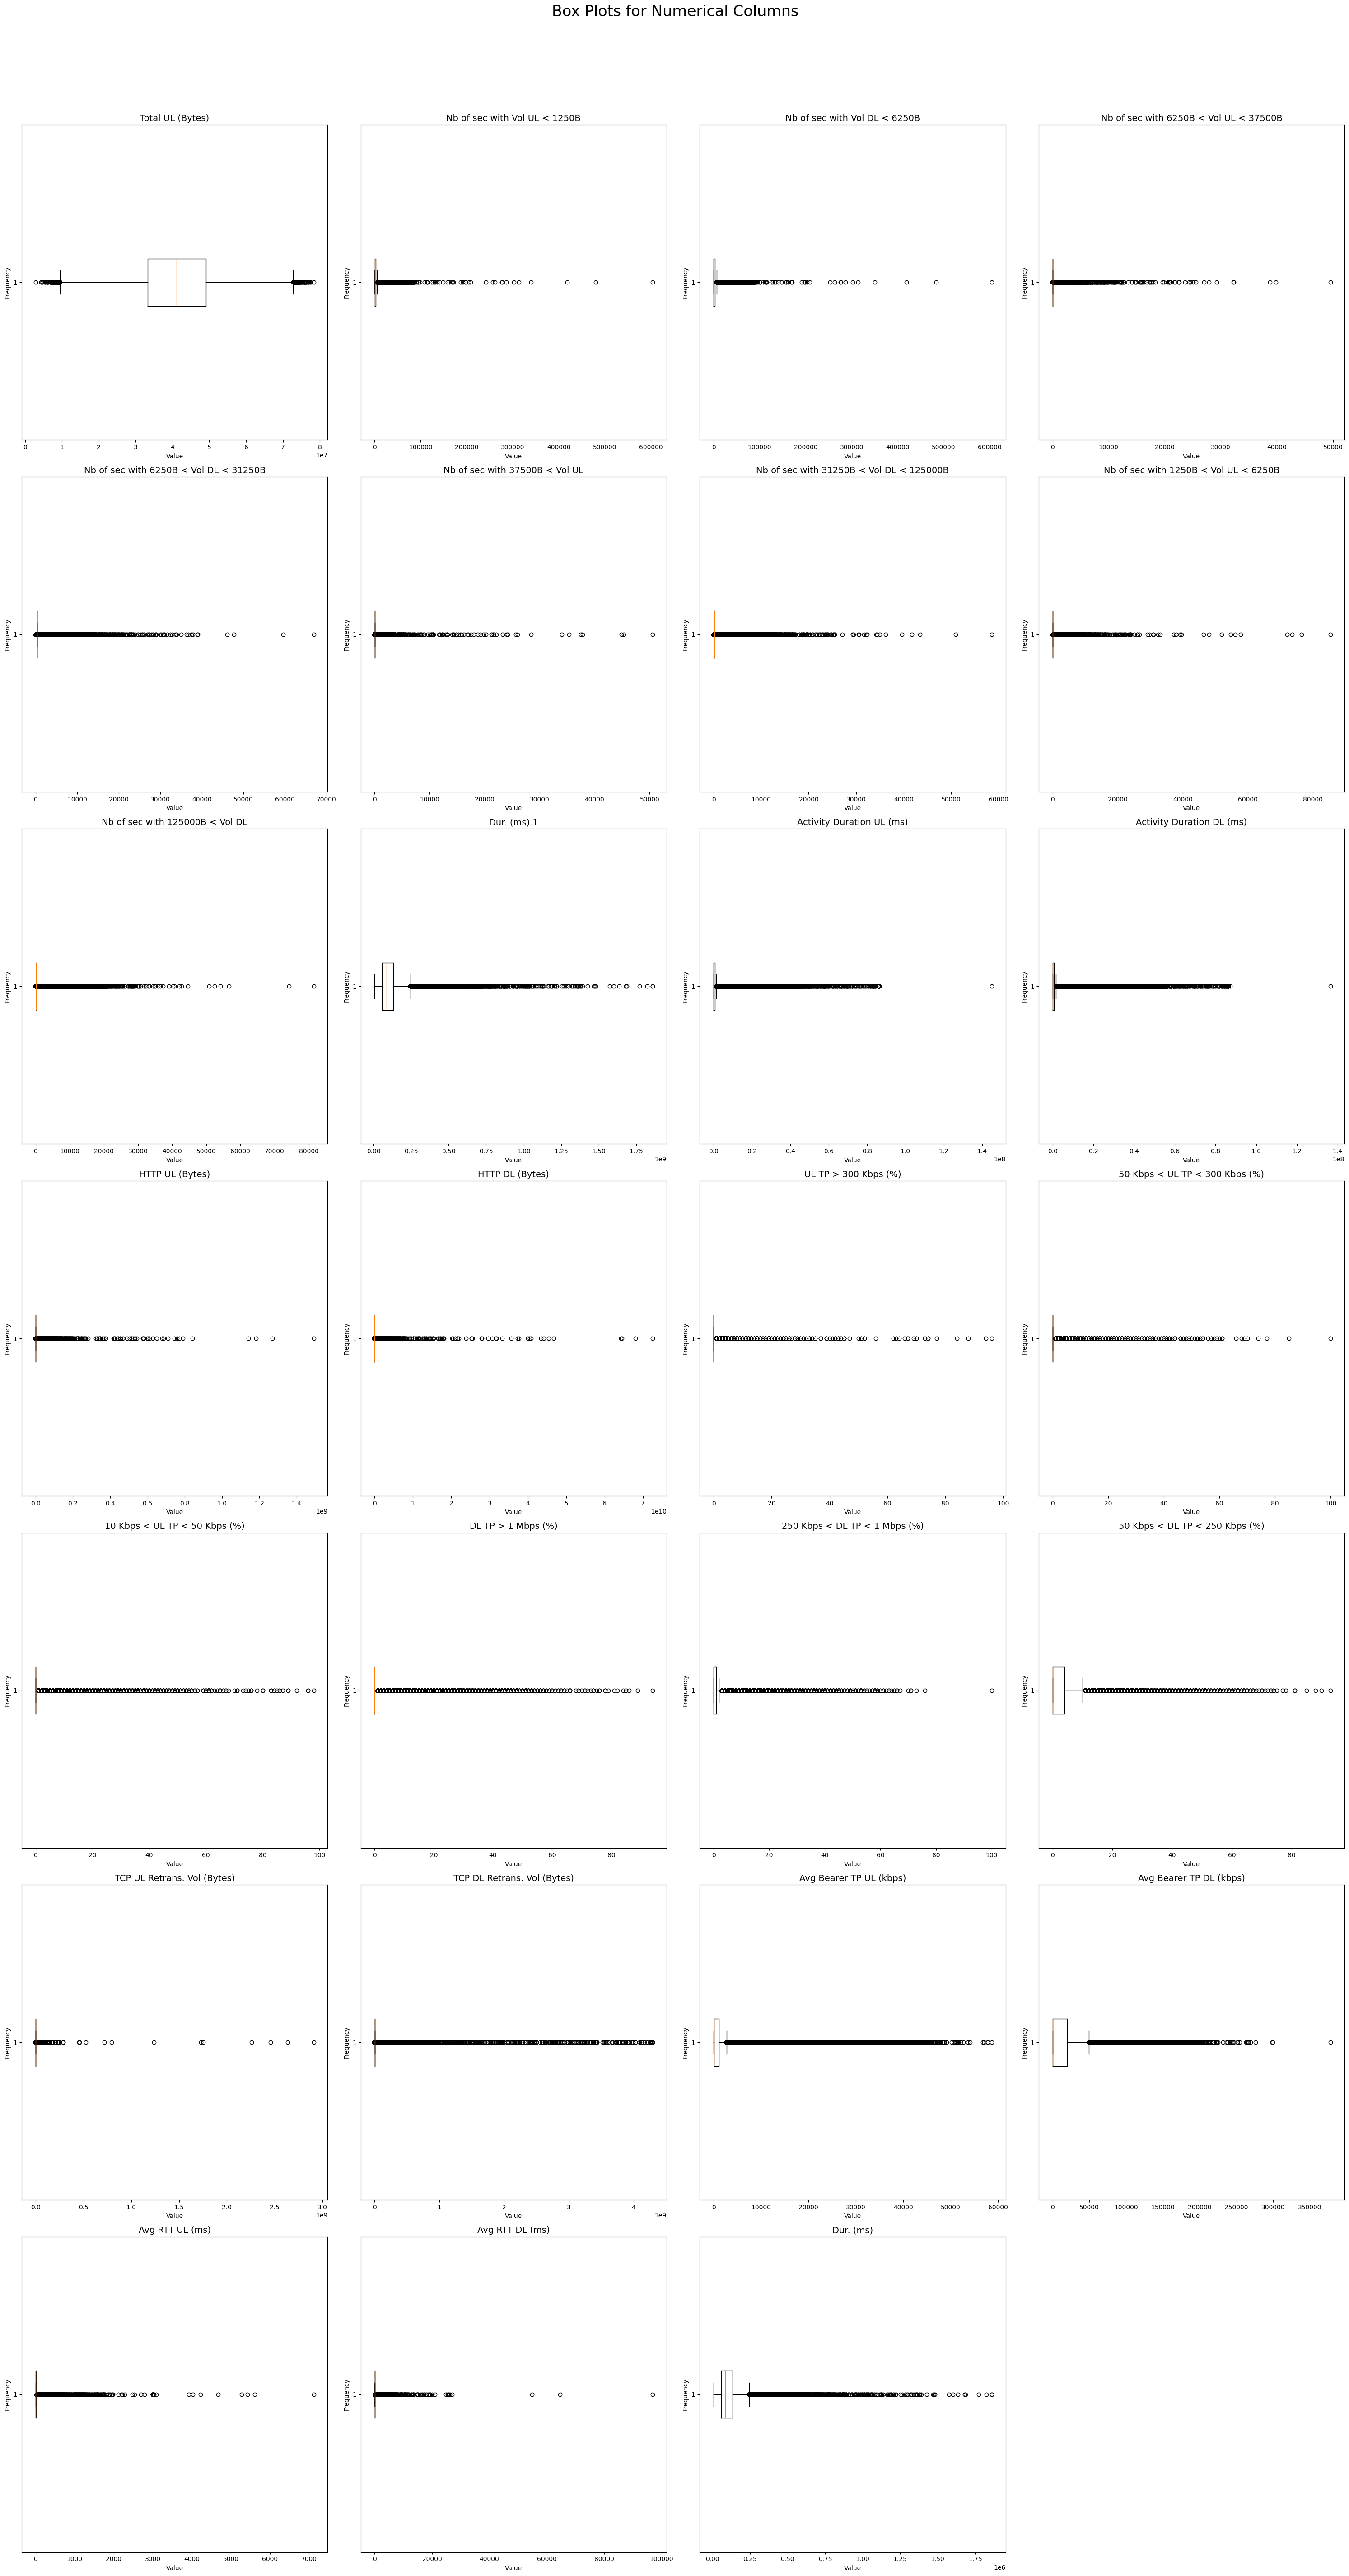

In [54]:
# List of columns to draw box plots according to the above result
columns_to_plot = [
    "Total UL (Bytes)",
    "Nb of sec with Vol UL < 1250B",
    "Nb of sec with Vol DL < 6250B",
    "Nb of sec with 6250B < Vol UL < 37500B",
    "Nb of sec with 6250B < Vol DL < 31250B",
    "Nb of sec with 37500B < Vol UL",
    "Nb of sec with 31250B < Vol DL < 125000B",
    "Nb of sec with 1250B < Vol UL < 6250B",
    "Nb of sec with 125000B < Vol DL",
    "Dur. (ms).1",
    "Activity Duration UL (ms)",
    "Activity Duration DL (ms)",
    "HTTP UL (Bytes)",
    "HTTP DL (Bytes)",
    "UL TP > 300 Kbps (%)",
    "50 Kbps < UL TP < 300 Kbps (%)",
    "10 Kbps < UL TP < 50 Kbps (%)",
    "DL TP > 1 Mbps (%)",
    "250 Kbps < DL TP < 1 Mbps (%)",
    "50 Kbps < DL TP < 250 Kbps (%)",
    "TCP UL Retrans. Vol (Bytes)",
    "TCP DL Retrans. Vol (Bytes)",
    "Avg Bearer TP UL (kbps)",
    "Avg Bearer TP DL (kbps)",
    "Avg RTT UL (ms)",
    "Avg RTT DL (ms)",
    "Dur. (ms)"
]

# Call the plot_boxplots function
plot_boxplots(telecom_data, columns_to_plot)


In [55]:
top_10_handsets, top_3_manufacturers, top_5_handsets_per_manufacturer = analyze_handsets_data(telecom_data)

# Display results
print("Top 10 Handsets:")
print(top_10_handsets)
print("\nTop 3 Handset Manufacturers:")
print(top_3_manufacturers)
print("\nTop 5 Handsets per Top 3 Handset Manufacturers:")
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\nManufacturer: {manufacturer}")
    print(handsets)


Top 10 Handsets:
Handset Type
Huawei B528S-23A                19754
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59567
Samsung    40821
Huawei     34423
Name: count, dtype: int64

Top 5 Handsets per Top 3 Handset Manufacturers:

Manufacturer: Apple
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Manufacturer: Samsung
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (S

/home/samrawit/Kifya AIM/Challenge 2/TellcoTelecomGrowthAnalysis/scripts/plot.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index.astype(str), palette=color_palette)


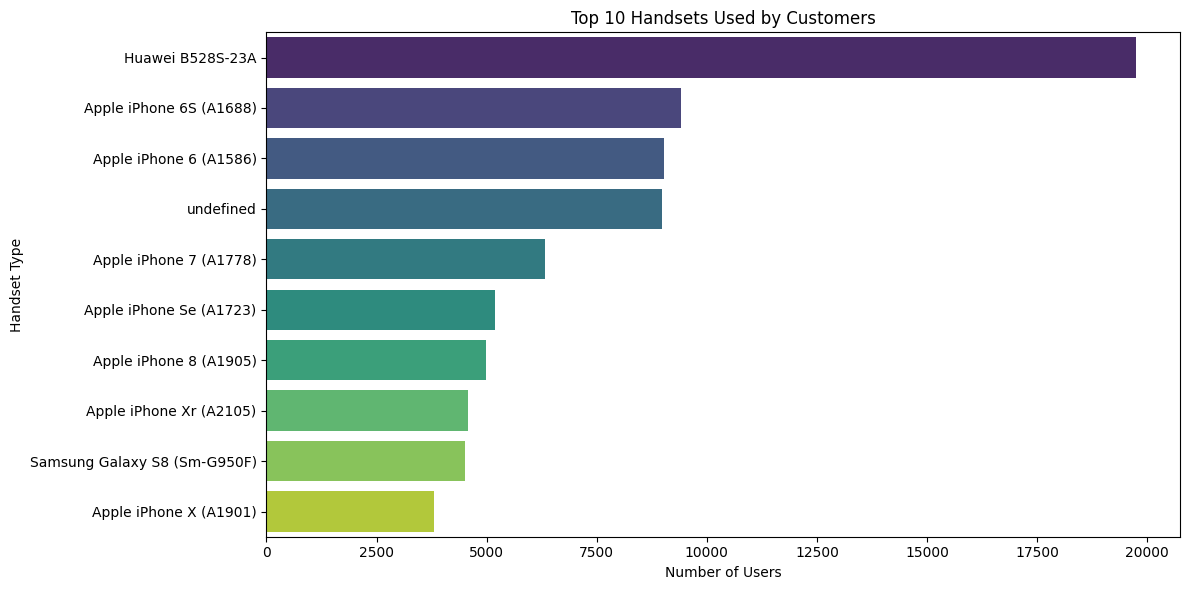

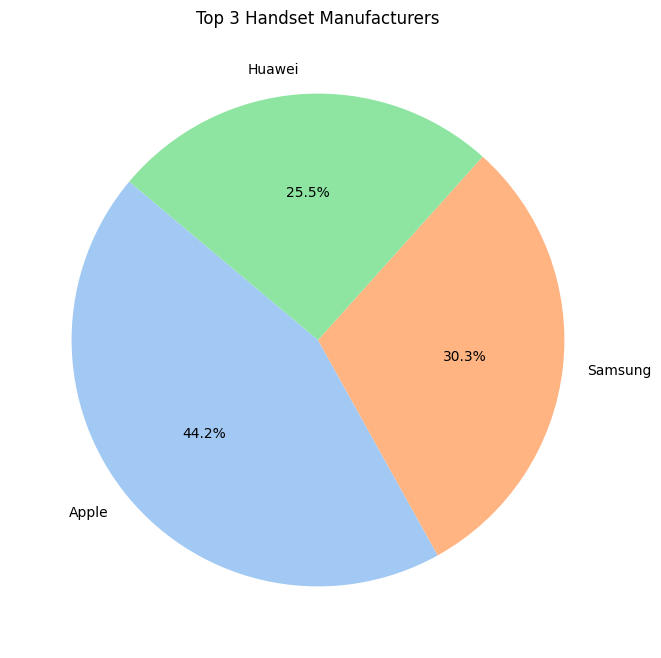

/home/samrawit/Kifya AIM/Challenge 2/TellcoTelecomGrowthAnalysis/scripts/plot.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index.astype(str), palette=color_palette)


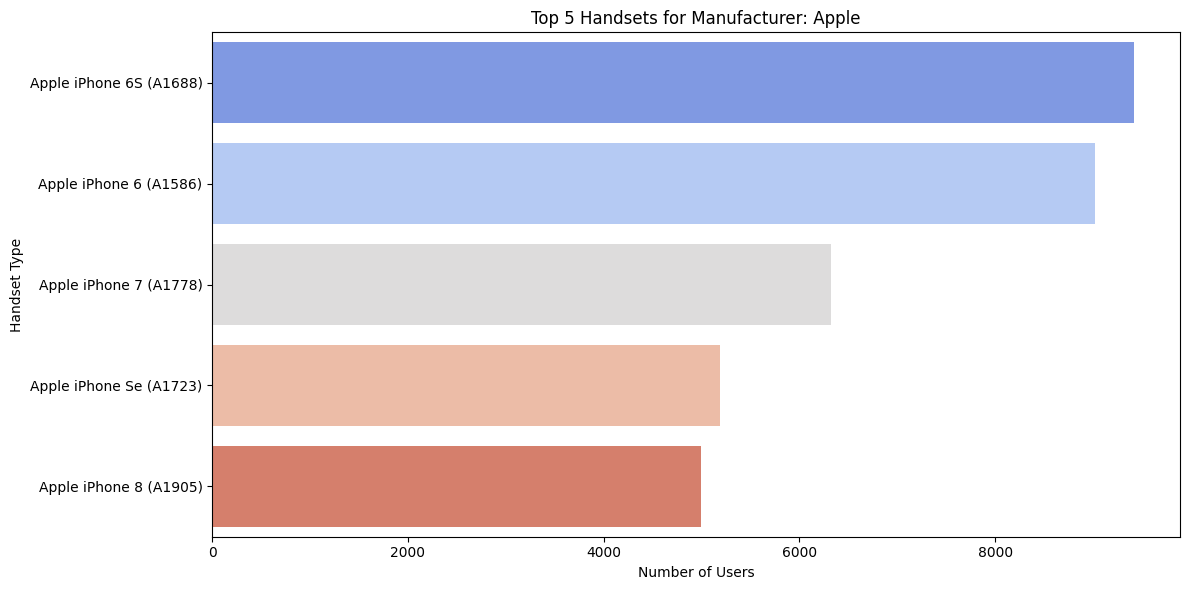

/home/samrawit/Kifya AIM/Challenge 2/TellcoTelecomGrowthAnalysis/scripts/plot.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index.astype(str), palette=color_palette)


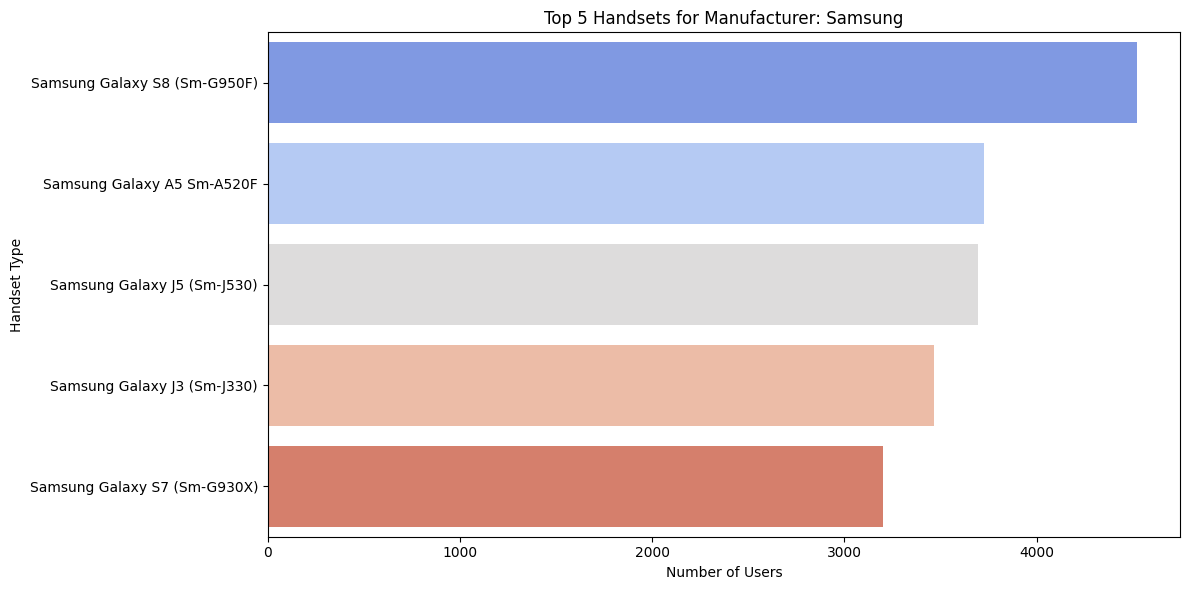

/home/samrawit/Kifya AIM/Challenge 2/TellcoTelecomGrowthAnalysis/scripts/plot.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index.astype(str), palette=color_palette)


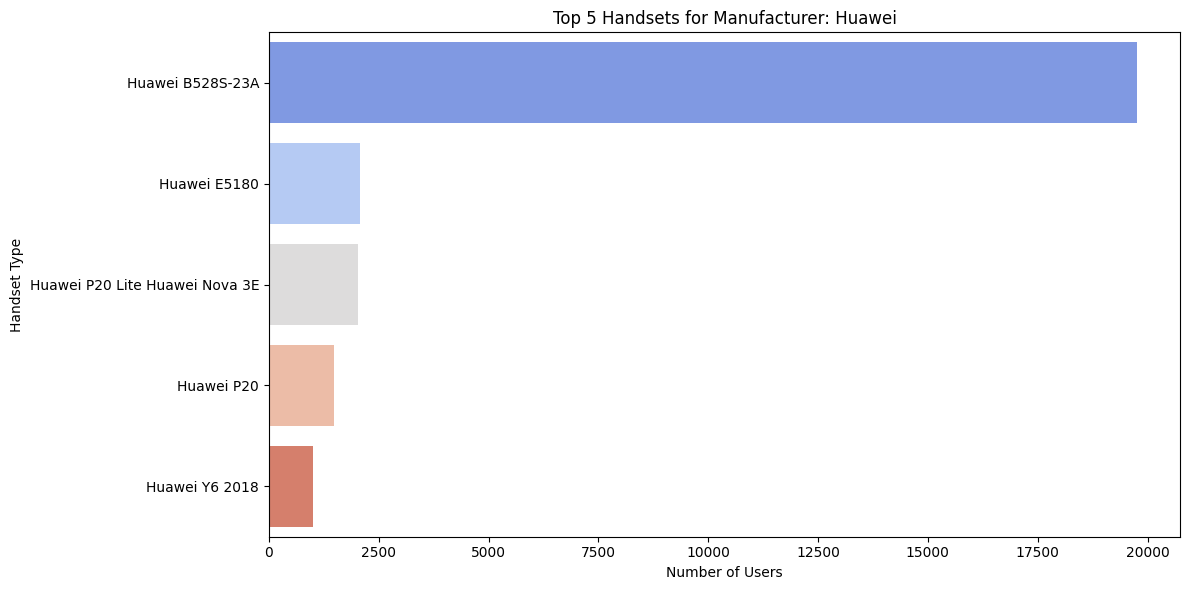

In [56]:
# Analyze handset data
top_10_handsets, top_3_manufacturers, top_5_handsets_per_manufacturer = analyze_handsets_data(telecom_data)

# Plotting Bar Chart for Top 10 Handsets
plot_bar_chart(
    data=top_10_handsets, 
    x_col='Handset_Type', 
    y_col='Number_of_Users',
    title="Top 10 Handsets Used by Customers", 
    x_label="Handset Type", 
    y_label="Number of Users", 
    color_palette="viridis", 
    horizontal=True
)

# Plotting Pie Chart for Top 3 Manufacturers
plot_pie_chart(
    top_3_manufacturers, 
    title="Top 3 Handset Manufacturers", 
    colors=sns.color_palette("pastel")[:3]
)

# Loop through manufacturers to plot top 5 handsets for each
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    plot_bar_chart(
        data=handsets,  
        x_col='Handset_Type', 
        y_col='Number_of_Users',
        title=f"Top 5 Handsets for Manufacturer: {manufacturer}", 
        x_label="Handset Type", 
        y_label="Number of Users", 
        color_palette="coolwarm", 
        horizontal=True
    )

User Behavior Overview

In [57]:
# Add total data volume column
telecom_data['Total Data Volume (Bytes)'] = telecom_data['Total DL (Bytes)'] + telecom_data['Total UL (Bytes)']

# Aggregating per user
aggregated_data = telecom_data.groupby('IMSI').agg(
    Number_of_xDR_Sessions=('Bearer Id', 'nunique'),
    Total_Session_Duration=('Dur. (ms)', 'sum'),
    Total_Download_Data=('Total DL (Bytes)', 'sum'),
    Total_Upload_Data=('Total UL (Bytes)', 'sum'),
    Total_Data_Volume=('Total Data Volume (Bytes)', 'sum'),
    Social_Media_DL=('Social Media DL (Bytes)', 'sum'),
    Social_Media_UL=('Social Media UL (Bytes)', 'sum'),
    Google_DL=('Google DL (Bytes)', 'sum'),
    Google_UL=('Google UL (Bytes)', 'sum'),
    Email_DL=('Email DL (Bytes)', 'sum'),
    Email_UL=('Email UL (Bytes)', 'sum'),
    Youtube_DL=('Youtube DL (Bytes)', 'sum'),
    Youtube_UL=('Youtube UL (Bytes)', 'sum'),
    Netflix_DL=('Netflix DL (Bytes)', 'sum'),
    Netflix_UL=('Netflix UL (Bytes)', 'sum'),
    Gaming_DL=('Gaming DL (Bytes)', 'sum'),
    Gaming_UL=('Gaming UL (Bytes)', 'sum'),
    Other_DL=('Other DL (Bytes)', 'sum'),
    Other_UL=('Other UL (Bytes)', 'sum')
).reset_index()

# Display the aggregated data
aggregated_data.head(10)


,IMSI,Number_of_xDR_Sessions,Total_Session_Duration,Total_Download_Data,Total_Upload_Data,Total_Data_Volume,Social_Media_DL,Social_Media_UL,Google_DL,Google_UL,Email_DL,Email_UL,Youtube_DL,Youtube_UL,Netflix_DL,Netflix_UL,Gaming_DL,Gaming_UL,Other_DL,Other_UL
0,204047108489451,1,869844.0,78697597.0,60456049.0,1.391536e+08,1500145.0,45943.0,5985089.0,3233558.0,2518425.0,812549.0,18980320.0,21960390.0,21621336.0,7224894.0,28092282.0,14977978.0,3.891597e+08,12200737.0
1,204080810288647,1,877385.0,194828056.0,37295915.0,2.321240e+08,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,164563605.0,13485133.0,4.676781e+08,2848373.0
2,208200101016140,1,86019.0,31376981.0,53794658.0,8.517164e+07,3073697.0,49084.0,603691.0,1020971.0,3076735.0,580766.0,5556563.0,14325876.0,15305361.0,16525201.0,3760934.0,5363582.0,5.000445e+08,15929178.0
3,208200101127285,1,86254.0,392918313.0,33583272.0,4.265016e+08,2542767.0,34337.0,10699827.0,3111651.0,3248863.0,606871.0,22414714.0,3242918.0,10065639.0,17720213.0,343946503.0,159394.0,3.009029e+08,8707888.0
4,208200101148045,2,573923.0,961767023.0,71325004.0,1.033092e+09,3326811.0,99905.0,9118088.0,2547799.0,4225757.0,1338705.0,4046597.0,9793604.0,30748449.0,26594966.0,910301321.0,7383445.0,1.055869e+09,23566580.0
5,208200101148074,1,13835.0,665593389.0,39212281.0,7.048057e+08,996268.0,55565.0,9712501.0,3562840.0,3110793.0,328100.0,14819244.0,4777564.0,15494900.0,18682284.0,621459683.0,11285996.0,5.487023e+08,519932.0
6,208200101148075,2,372454.0,886414496.0,70799015.0,9.572135e+08,3725468.0,61955.0,17794518.0,1955085.0,2970311.0,1357475.0,22423599.0,28483644.0,11125776.0,18756361.0,828374824.0,6844074.0,4.664378e+08,13340421.0
7,208200101148136,2,232058.0,963285344.0,38413689.0,1.001699e+09,5135342.0,57368.0,10633680.0,3430744.0,4239010.0,1302415.0,7080191.0,4743270.0,11084592.0,5962954.0,925112529.0,14486203.0,1.060999e+09,8430735.0
8,208200101148139,1,86399.0,425721468.0,26142870.0,4.518643e+08,1222570.0,43904.0,4829972.0,835257.0,195248.0,308702.0,10863143.0,5446918.0,13933340.0,11341471.0,394677195.0,5596614.0,7.964959e+08,2570004.0
9,208200101148152,1,136356.0,314032149.0,53095277.0,3.671274e+08,2204363.0,19414.0,7763124.0,1312339.0,957653.0,688209.0,15259721.0,20625771.0,8292425.0,17303078.0,279554863.0,10452308.0,3.515693e+08,2694158.0


Number of xDR Sessions per User

/home/samrawit/Kifya AIM/Challenge 2/TellcoTelecomGrowthAnalysis/scripts/plot.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[x_col], y=data[y_col], palette=color_palette)


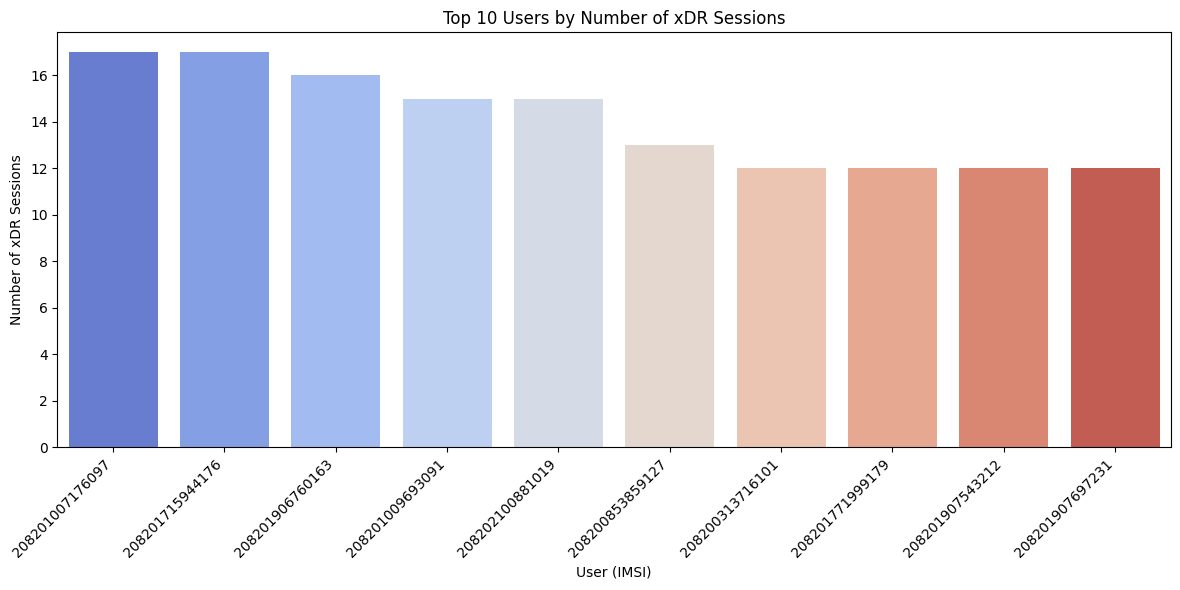

['208200313027069',
 '208201447204092',
 '208201402622202',
 '208201909529270',
 '208201771679008',
 '208200853901146',
 '208201545794016',
 '208201544648140',
 '208201714481014',
 '208201544229309',
 '208201449230912',
 '208201715444308',
 '208201449050131',
 '208200311283140',
 '208201543919003',
 '208201448342098',
 '208201449235927',
 '208201716147090',
 '208200854001655',
 '208201907645245',
 '208201771753199',
 '208201772013101',
 '208201907731101',
 '208201715270384',
 '208201402245007',
 '208201909769111',
 '208201714515129',
 '208201006463051',
 '208201009699100',
 '208201401287196',
 '208201401288490',
 '208200854459111',
 '208201771265071',
 '208201716800227',
 '208201908136164',
 '208201771674381',
 '208201713592063',
 '208200314629139',
 '208201907168276',
 '208201715877076',
 '208201907938040',
 '208201906740069',
 '208201907829187',
 '208201449608160',
 '208201715345132',
 '208201449211363',
 '208201402648128',
 '208201449517004',
 '208201546496060',
 '208201449524077',


In [58]:
# Get the top 10 users based on Number_of_xDR_Sessions
top_xdr_users = aggregated_data.nlargest(10, 'Number_of_xDR_Sessions')


# Call the plot_bar_chart function with the desired parameters
plot_bar_chart(
    data=top_xdr_users,
    x_col='IMSI',  # IMSI will be on the x-axis
    y_col='Number_of_xDR_Sessions',  # Number_of_xDR_Sessions will be on the y-axis
    x_label="User (IMSI)",  # Label for the x-axis
    y_label="Number of xDR Sessions",  # Label for the y-axis
    title="Top 10 Users by Number of xDR Sessions",  # Title of the chart
    color_palette="coolwarm",  # Color palette for the bars
    horizontal=False  # Use vertical bars
)


outlier_imsis

In [59]:
top_xdr_users[['IMSI', 'Number_of_xDR_Sessions']].head(10)

,IMSI,Number_of_xDR_Sessions
15895,208201007176097,17
71848,208201715944176,17
88186,208201906760163,16
25251,208201009693091,15
101056,208202100881019,15
10550,208200853859127,13
2964,208200313716101,12
84618,208201771999179,12
89686,208201907543212,12
90076,208201907697231,12


Total Data Volume per User

/home/samrawit/Kifya AIM/Challenge 2/TellcoTelecomGrowthAnalysis/scripts/plot.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[x_col], y=data[y_col], palette=color_palette)


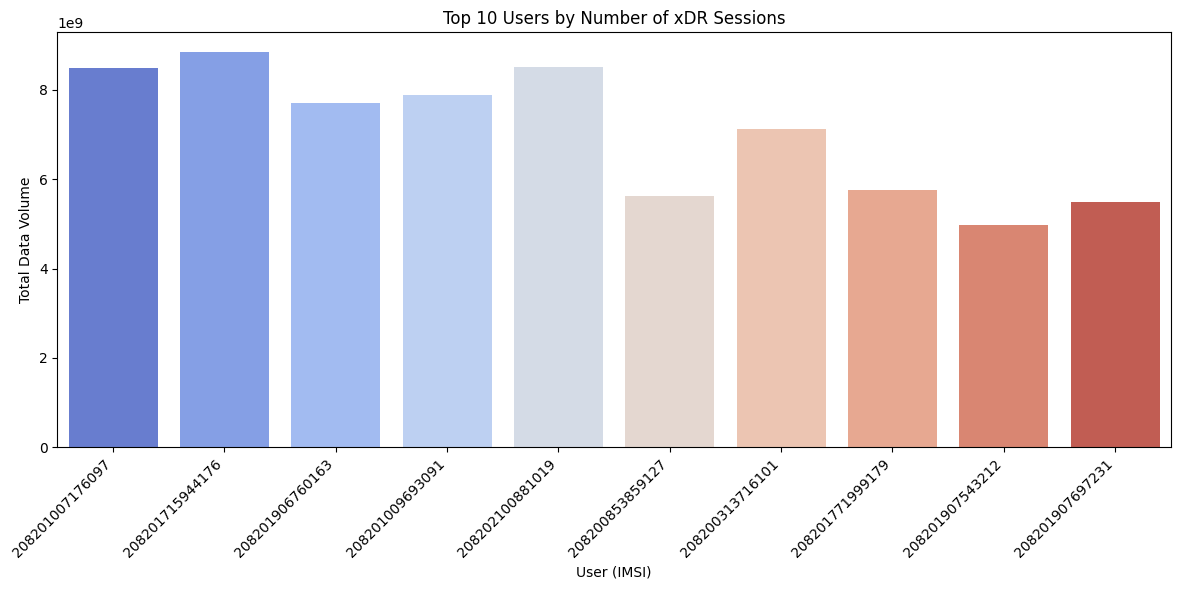

In [60]:
# Top 10 users by total data volume
top_data_users = aggregated_data.nlargest(10, 'Total_Data_Volume')

plot_bar_chart(
    data=top_xdr_users,
    x_col='IMSI',  # IMSI will be on the x-axis
    y_col='Total_Data_Volume',  # Number_of_xDR_Sessions will be on the y-axis
    x_label="User (IMSI)",  # Label for the x-axis
    y_label="Total Data Volume",  # Label for the y-axis
    title="Top 10 Users by Number of xDR Sessions",  # Title of the chart
    color_palette="coolwarm",  # Color palette for the bars
    horizontal=False  # Use vertical bars
)


In [61]:
top_data_users[['IMSI', 'Total_Data_Volume']].head(10)

,IMSI,Total_Data_Volume
71848,208201715944176,8.846226e+09
101056,208202100881019,8.514774e+09
15895,208201007176097,8.499621e+09
25251,208201009693091,7.891111e+09
88186,208201906760163,7.705863e+09
35405,208201402604136,7.308501e+09
2964,208200313716101,7.132371e+09
62319,208201714300272,6.872018e+09
49822,208201545274157,6.540899e+09
65981,208201715259333,6.452398e+09


Application-wise Data Usage

/home/samrawit/Kifya AIM/Challenge 2/TellcoTelecomGrowthAnalysis/scripts/plot.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index.astype(str), y=data.values, palette=color_palette)


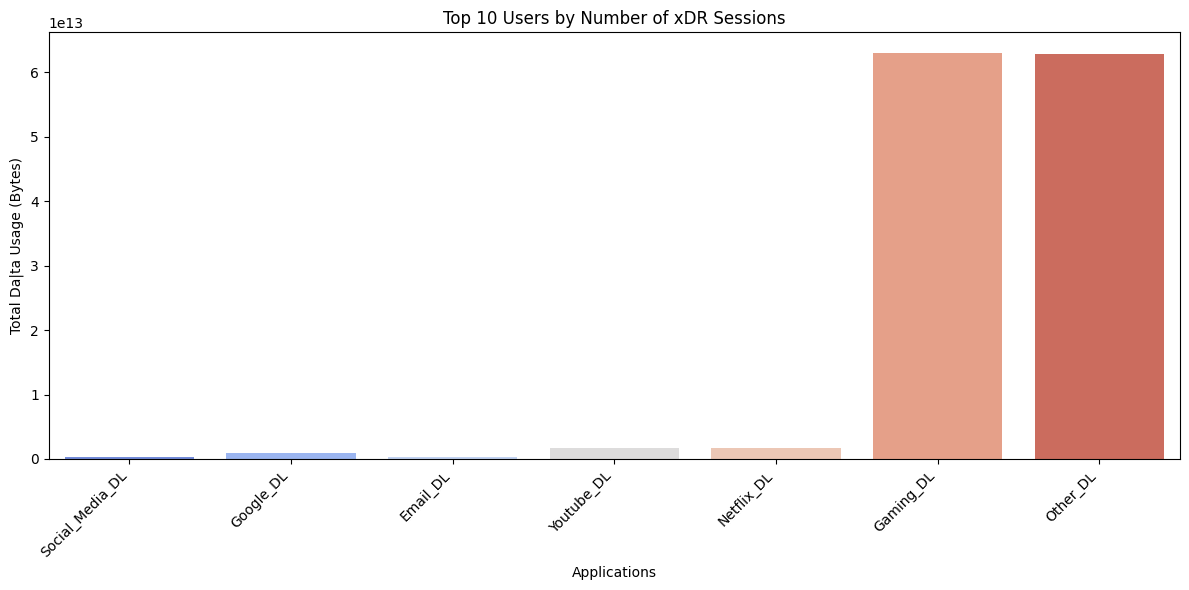

In [62]:
# Aggregating application-wise data
application_data = aggregated_data[['Social_Media_DL', 'Google_DL', 'Email_DL', 'Youtube_DL', 'Netflix_DL', 'Gaming_DL', 'Other_DL']].sum()

plot_bar_chart(
    data=application_data,
    x_col='IMSI',  # IMSI will be on the x-axis
    y_col='Total_Data_Volume',  # Number_of_xDR_Sessions will be on the y-axis
    x_label="Applications",  # Label for the x-axis
    y_label="Total Da|ta Usage (Bytes)",  # Label for the y-axis
    title="Top 10 Users by Number of xDR Sessions",  # Title of the chart
    color_palette="coolwarm",  # Color palette for the bars
    horizontal=False  # Use vertical bars
)


/home/samrawit/Kifya AIM/Challenge 2/TellcoTelecomGrowthAnalysis/scripts/plot.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[x_col], y=data[y_col], palette=color_palette)


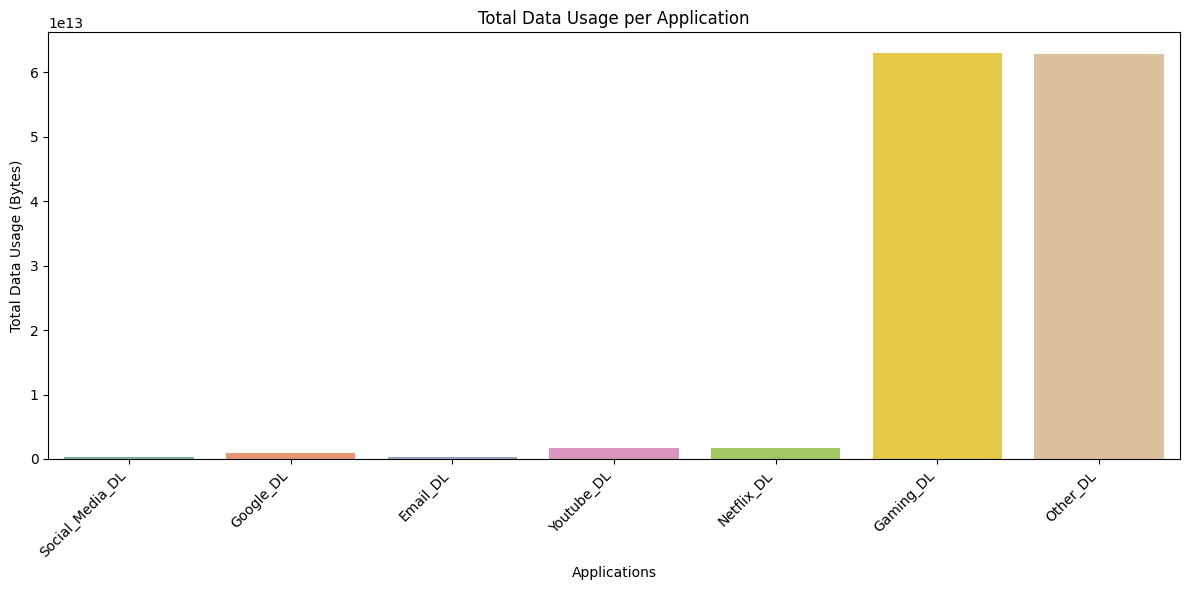

In [63]:
application_data = aggregated_data[['Social_Media_DL', 'Google_DL', 'Email_DL', 'Youtube_DL', 'Netflix_DL', 'Gaming_DL', 'Other_DL']].sum()

if isinstance(application_data, pd.Series):
    application_data = application_data.reset_index()
    application_data.columns = ['Application', 'Data Usage']

# Call the plot_bar_chart function
plot_bar_chart(
    data=application_data,
    x_col='Application',          # Column to use for the x-axis
    y_col='Data Usage',           # Column to use for the y-axis
    title="Total Data Usage per Application",
    x_label="Applications",       # Label for x-axis
    y_label="Total Data Usage (Bytes)",  # Label for y-axis
    color_palette="Set2",         # Choose your color palette
    horizontal=False              # False for vertical bars
)


In [64]:
application_data.head(10)


,Application,Data Usage
0,Social_Media_DL,2.682234e+11
1,Google_DL,8.592992e+11
2,Email_DL,2.676895e+11
3,Youtube_DL,1.738107e+12
4,Netflix_DL,1.737107e+12
5,Gaming_DL,6.306077e+13
6,Other_DL,6.292332e+13


Session Duration Distribution

/home/samrawit/Kifya AIM/Challenge 2/TellcoTelecomGrowthAnalysis/scripts/plot.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[y_col], y=data[x_col].astype(str), palette=color_palette)


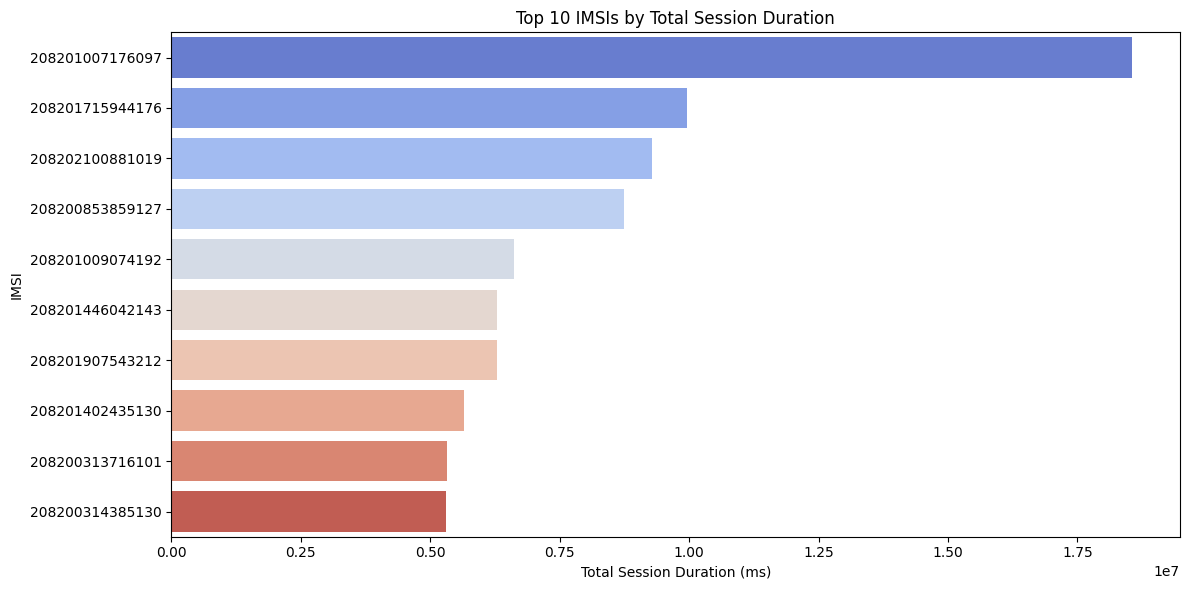

In [65]:
# Aggregate the data by IMSI and calculate the sum of Total_Session_Duration for each IMSI
aggregated_imsi_data = aggregated_data.groupby('IMSI')['Total_Session_Duration'].sum().reset_index()

# Sort the data to get the top 10 IMSIs by Total_Session_Duration
top_10_imsi_data = aggregated_imsi_data.nlargest(10, 'Total_Session_Duration')

# Call plot_bar_chart function with the top 10 IMSIs and their total session durations
plot_bar_chart(
    data=top_10_imsi_data,
    x_col='IMSI',  # IMSI on the x-axis
    y_col='Total_Session_Duration',  # Total Session Duration on the y-axis
    title="Top 10 IMSIs by Total Session Duration",
    x_label="IMSI",
    y_label="Total Session Duration (ms)",
    color_palette="coolwarm",  # Choose your preferred color palette
    horizontal=True  # Horizontal bars
)


Total Session duraction Per User

In [66]:
aggregated_imsi_data.head(10)

,IMSI,Total_Session_Duration
0,204047108489451,869844.0
1,204080810288647,877385.0
2,208200101016140,86019.0
3,208200101127285,86254.0
4,208200101148045,573923.0
5,208200101148074,13835.0
6,208200101148075,372454.0
7,208200101148136,232058.0
8,208200101148139,86399.0
9,208200101148152,136356.0


In [67]:
aggregated_imsi_data.describe()

,Total_Session_Duration
count,1.072640e+05
mean,1.458549e+05
std,1.844733e+05
min,7.142000e+03
25%,7.040875e+04
50%,1.024495e+05
75%,1.727990e+05
max,1.855375e+07


Total downlaod and upload per user

In [68]:
# Aggregating Total Download Data and Total Upload Data by IMSI (User)
download_upload_data = aggregated_data[['IMSI', 'Total_Download_Data', 'Total_Upload_Data']]

# Display the aggregated data for all users
print("Total Download and Upload Data by User:")
download_upload_data[['IMSI', 'Total_Download_Data', 'Total_Upload_Data']]



Total Download and Upload Data by User:


,IMSI,Total_Download_Data,Total_Upload_Data
0,204047108489451,78697597.0,60456049.0
1,204080810288647,194828056.0,37295915.0
2,208200101016140,31376981.0,53794658.0
3,208200101127285,392918313.0,33583272.0
4,208200101148045,961767023.0,71325004.0
...,...,...,...
107259,208209850788090,688815403.0,33888182.0
107260,208209850788245,451173021.0,44692550.0
107261,208209850788283,307825104.0,30355487.0
107262,208252167239575,800629358.0,45083854.0


/home/samrawit/Kifya AIM/Challenge 2/TellcoTelecomGrowthAnalysis/scripts/plot.py:282: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = data.set_index(x_col)[y_cols].plot(kind='bar', stacked=True, figsize=figsize, cmap='viridis', color=colors)
/home/samrawit/Kifya AIM/Challenge 2/TellcoTelecomGrowthAnalysis/scripts/plot.py:282: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = data.set_index(x_col)[y_cols].plot(kind='bar', stacked=True, figsize=figsize, cmap='viridis', color=colors)


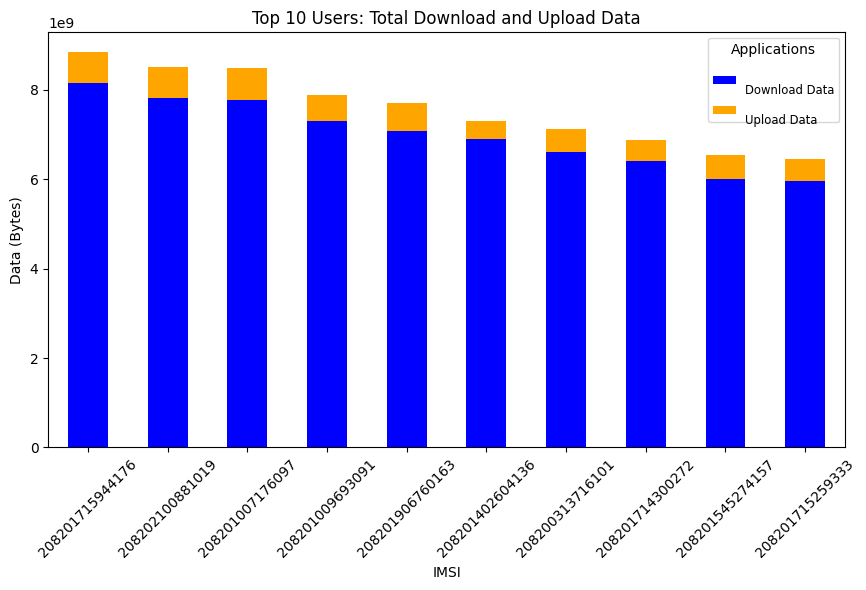

In [69]:
# Sort the data based on Total Download Data and Total Upload Data in descending order
download_upload_data_sorted = download_upload_data.sort_values(by=['Total_Download_Data', 'Total_Upload_Data'], ascending=False)

# Select the top 10 users
top_10_users = download_upload_data_sorted.head(10)

# Reset index to avoid potential issues with x-axis plotting
top_10_users = top_10_users.reset_index(drop=True)  # Reset the index here

# Use the function to plot the stacked bar plot
plot_stacked_bar(
    data=top_10_users,
    x_col='IMSI',
    y_cols=['Total_Download_Data', 'Total_Upload_Data'],
    labels=['Download Data', 'Upload Data'],
    colors=['blue', 'orange'],
    title='Top 10 Users: Total Download and Upload Data',
    xlabel='IMSI',
    ylabel='Data (Bytes)',
    figsize=(10, 6),
    rotation=45,  # Rotate labels 45 degrees
    ha='right',  # Right-align the labels
    va='top'  # Align the labels at the top for better readability
)



Engagement to applications per User

/home/samrawit/Kifya AIM/Challenge 2/TellcoTelecomGrowthAnalysis/scripts/plot.py:282: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = data.set_index(x_col)[y_cols].plot(kind='bar', stacked=True, figsize=figsize, cmap='viridis', color=colors)


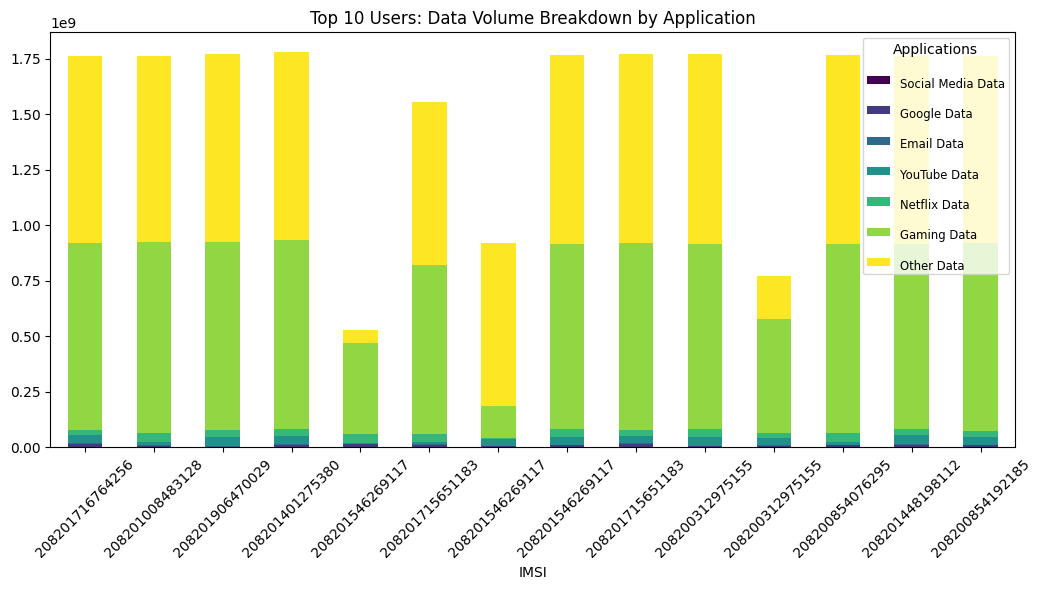

In [70]:
# data preparation 
telecom_data['Total_Social_Media_Data'] = telecom_data['Social Media DL (Bytes)'] + telecom_data['Social Media UL (Bytes)']
telecom_data['Total_Google_Data'] = telecom_data['Google DL (Bytes)'] + telecom_data['Google UL (Bytes)']
telecom_data['Total_Email_Data'] = telecom_data['Email DL (Bytes)'] + telecom_data['Email UL (Bytes)']
telecom_data['Total_Youtube_Data'] = telecom_data['Youtube DL (Bytes)'] + telecom_data['Youtube UL (Bytes)']
telecom_data['Total_Netflix_Data'] = telecom_data['Netflix DL (Bytes)'] + telecom_data['Netflix UL (Bytes)']
telecom_data['Total_Gaming_Data'] = telecom_data['Gaming DL (Bytes)'] + telecom_data['Gaming UL (Bytes)']
telecom_data['Total_Other_Data'] = telecom_data['Other DL (Bytes)'] + telecom_data['Other UL (Bytes)']

# Select the columns for plotting: User and Total Data Volume for each application
data_volume_by_app = telecom_data[['IMSI', 
                                   'Total_Social_Media_Data', 
                                   'Total_Google_Data', 
                                   'Total_Email_Data', 
                                   'Total_Youtube_Data', 
                                   'Total_Netflix_Data', 
                                   'Total_Gaming_Data', 
                                   'Total_Other_Data']]

# Sort the data by the total data volume across all applications for each user (in descending order)
data_volume_by_app_sorted = data_volume_by_app.set_index('IMSI').sum(axis=1).sort_values(ascending=False).head(10)

# Get the top 10 users
top_10_users = data_volume_by_app.loc[data_volume_by_app['IMSI'].isin(data_volume_by_app_sorted.index)]

# Now use the plot_stacked_bar function with the correct parameters
plot_stacked_bar(
    data=top_10_users,
    title='Top 10 Users: Data Volume Breakdown by Application',
    x_col='IMSI',
    y_cols=[
        'Total_Social_Media_Data',
        'Total_Google_Data',
        'Total_Email_Data',
        'Total_Youtube_Data',
        'Total_Netflix_Data',
        'Total_Gaming_Data',
        'Total_Other_Data'
    ],
    labels=[
        'Social Media Data',
        'Google Data',
        'Email Data',
        'YouTube Data',
        'Netflix Data',
        'Gaming Data',
        'Other Data'
    ],
    figsize=(12, 6)
)


Data Volume vs. Number of Sessions (Correlation Analysis)

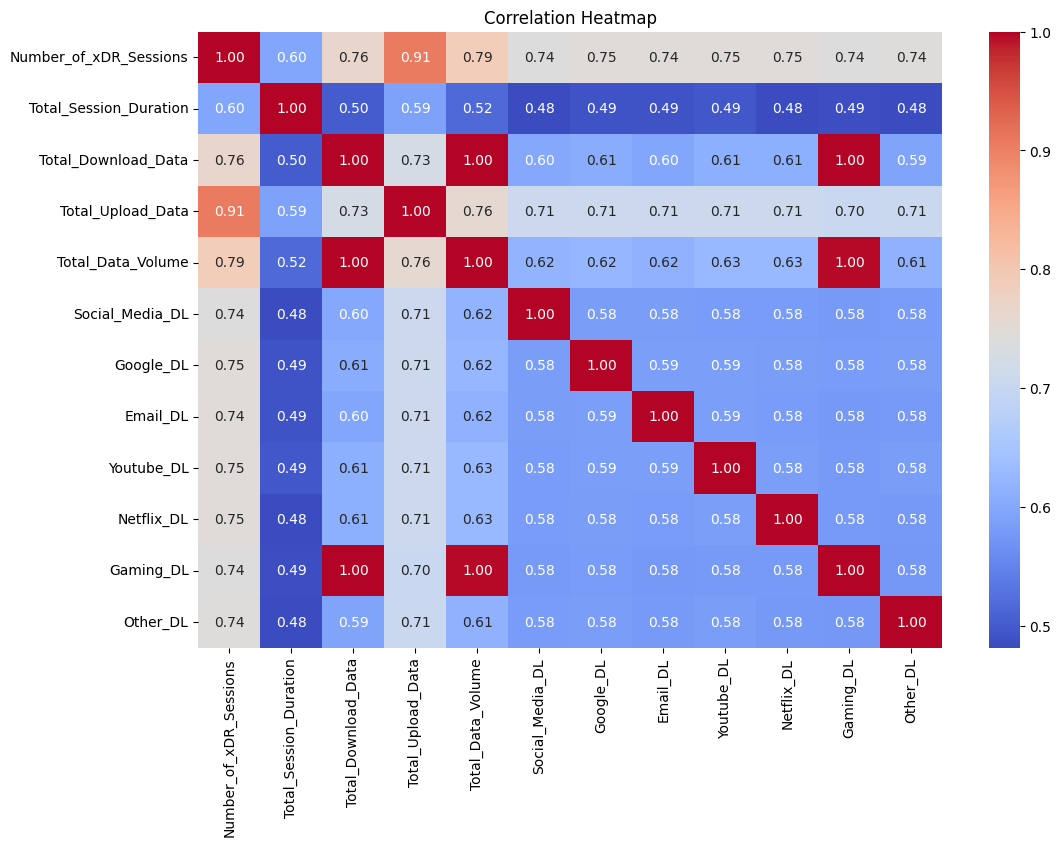

In [71]:
columns = ['Number_of_xDR_Sessions', 
           'Total_Session_Duration', 
           'Total_Download_Data', 
           'Total_Upload_Data', 
           'Total_Data_Volume', 
           'Social_Media_DL', 
           'Google_DL', 
           'Email_DL', 
           'Youtube_DL', 
           'Netflix_DL', 
           'Gaming_DL', 
           'Other_DL']

# Calling the function with your data and selected columns
plot_correlation_heatmap(aggregated_data, columns)


In [72]:
high_correlation_pairs = find_high_correlation_pairs(aggregated_data, threshold=0.80)
print("Pairs of variables with correlation above 0.80:\n", high_correlation_pairs)


Pairs of variables with correlation above 0.80:
                 Variable 1         Variable 2  Correlation
21  Number_of_xDR_Sessions  Total_Upload_Data     0.905887
55     Total_Download_Data  Total_Data_Volume     0.998751
66     Total_Download_Data          Gaming_DL     0.998984
78       Total_Upload_Data         Youtube_UL     0.843385
80       Total_Upload_Data         Netflix_UL     0.843485
82       Total_Upload_Data          Gaming_UL     0.808342
84       Total_Upload_Data           Other_UL     0.808354
95       Total_Data_Volume          Gaming_DL     0.996221


Variable Transformations: Segment Users into the Top Five Decile Classes Based on Total Duration

In [73]:
# Calculate total session duration per user
telecom_data['Total Duration'] = telecom_data.groupby('IMSI')['Dur. (ms)'].transform('sum')

# Calculate deciles based on total duration
deciles = pd.qcut(telecom_data['Total Duration'], 10, labels=False)  # 10 equal-sized bins

# Add decile classification to the DataFrame
telecom_data['Duration Decile'] = deciles

# Compute the total data (DL + UL) per decile
telecom_data['Total DL + UL'] = telecom_data['Total DL (Bytes)'] + telecom_data['Total UL (Bytes)']
total_data_per_decile = telecom_data.groupby('Duration Decile')['Total DL + UL'].sum().reset_index()

print(total_data_per_decile)


   Duration Decile  Total DL + UL
0                0   7.404849e+12
1                1   7.410426e+12
2                2   8.474828e+12
3                3   6.366800e+12
4                4   7.412612e+12
5                5   8.449348e+12
6                6   6.382955e+12
7                7   7.405502e+12
8                8   7.387109e+12
9                9   7.380774e+12


In [74]:
total_data_per_decile = calculate_decile(telecom_data)
print(total_data_per_decile)


   Duration Decile  Total DL + UL
0                0   7.404849e+12
1                1   7.410426e+12
2                2   8.474828e+12
3                3   6.366800e+12
4                4   7.412612e+12
5                5   8.449348e+12
6                6   6.382955e+12
7                7   7.405502e+12
8                8   7.387109e+12
9                9   7.380774e+12


/home/samrawit/Kifya AIM/Challenge 2/TellcoTelecomGrowthAnalysis/scripts/plot.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[x_col], y=data[y_col], palette=color_palette)


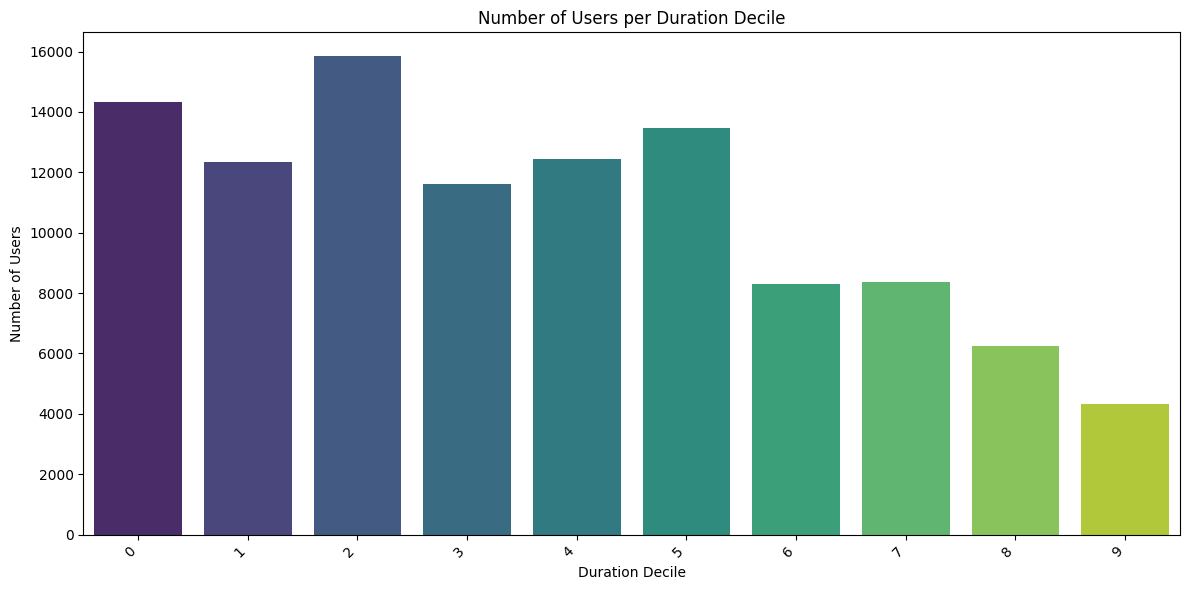

In [75]:
# Count the number of users in each decile
user_count_by_decile = telecom_data.groupby('Duration Decile')['IMSI'].nunique().reset_index()

# Call the plot_bar_chart function to visualize the count of users by decile
plot_bar_chart(data=user_count_by_decile, x_col='Duration Decile', y_col='IMSI', 
               x_label='Duration Decile', y_label='Number of Users', title='Number of Users per Duration Decile', color_palette='viridis')


Dimentionality Reduction

In [76]:
top_10_features = get_important_features(telecom_data, n_top_features=10)
print("Top 10 Most Important Features based on PCA Loadings:")
print(top_10_features)


Top 10 Most Important Features based on PCA Loadings:
                                                                           Feature  \
50 Kbps < DL TP < 250 Kbps (%)                      50 Kbps < DL TP < 250 Kbps (%)   
DL TP > 1 Mbps (%)                                              DL TP > 1 Mbps (%)   
Nb of sec with 6250B < Vol DL < 31250B      Nb of sec with 6250B < Vol DL < 31250B   
Netflix DL (Bytes)                                              Netflix DL (Bytes)   
Nb of sec with 1250B < Vol UL < 6250B        Nb of sec with 1250B < Vol UL < 6250B   
Nb of sec with 31250B < Vol DL < 125000B  Nb of sec with 31250B < Vol DL < 125000B   
Youtube DL (Bytes)                                              Youtube DL (Bytes)   
10 Kbps < UL TP < 50 Kbps (%)                        10 Kbps < UL TP < 50 Kbps (%)   
50 Kbps < UL TP < 300 Kbps (%)                      50 Kbps < UL TP < 300 Kbps (%)   
Netflix UL (Bytes)                                              Netflix UL (Bytes)   


/home/samrawit/Kifya AIM/Challenge 2/TellcoTelecomGrowthAnalysis/scripts/plot.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[x_col], y=data[y_col], palette=color_palette)


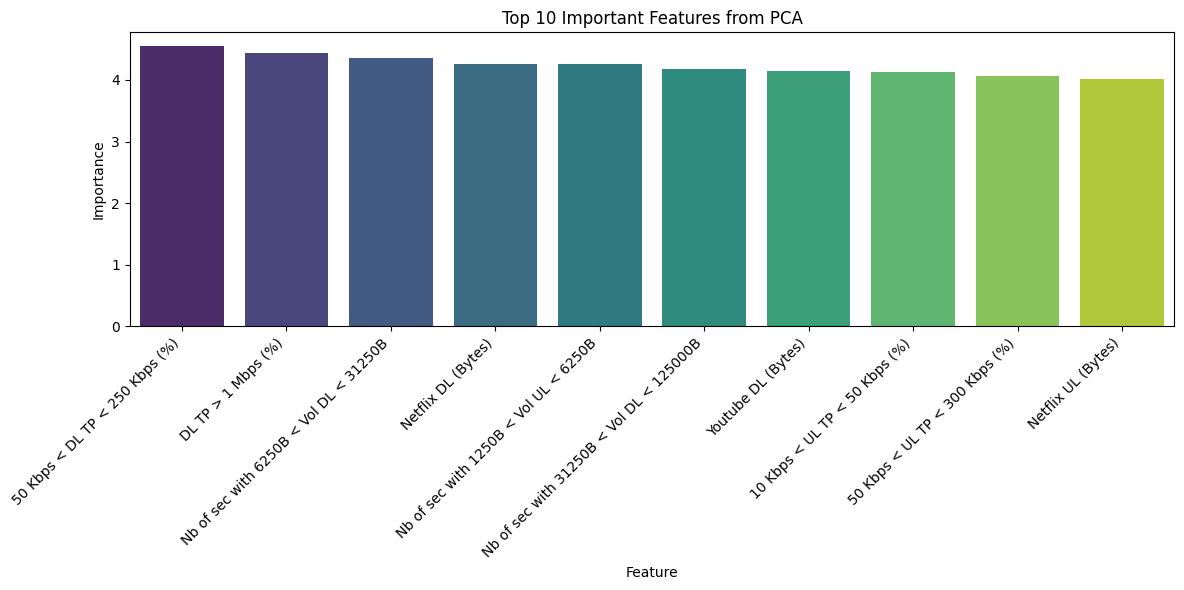

In [77]:

# Call the plot_bar_chart function to visualize the top 10 important features based on PCA loadings
plot_bar_chart(data=top_10_features.head(10), x_col='Feature', y_col='Importance', 
               x_label='Feature', y_label='Importance', title='Top 10 Important Features from PCA', color_palette='viridis')
